# Student Performance Indicator

## Project Lifecycle
+ Understanding the Problem Statement
+ Data Collection
+ Data Checks to Perform
+ Exploratory Data Analysis
+ Data Pre-Processing 
+ Model Training
+ Choose the best model

# 1. Problem Statement 
This project aims to understands how the student's performance is affected by variables such as Gender, Ethnicity, Parental level of education, Lunch, and Test preparation course.

# 2. Data Collection
+ Dataset source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
+ Dataset consists of the marks secured by the student in various subjects

## 2.1. Dataset Information
+ gender : sex of students -> (Male/female)
+ race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
+ parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
+ lunch : having lunch before test (standard or free/reduced)
+ test preparation course : complete or not complete before test
+ math score
+ reading score
+ writing score

## 2.2. Import Data & Required Libraries

In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Import the the CSV data file as Pandas DataFrame

In [262]:
df = pd.read_csv('data/stud.csv')

Show the first 5 rows

In [263]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


+ Column labels are not in standard and consistent format
+ Reformat these labels for ease of use in data analysis and modeling 

In [264]:
# Reformat column names for easier use
df.columns = [col.lower().replace(' ', '_').replace('/', '_') for col in df.columns]

Shape of the dataset (no. of columns & rows)

In [265]:
df.shape

(1000, 8)

# 3. Data Checks to Perform

+ Check missing values
+ Check duplicates 
+ Check datatypes
+ Check number of unique vales of each column
+ Check statistics of dataset
+ Check various categories present in the different categorical columns

## 3.1 Missing values

In [266]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no missing values in the dataset

## 3.2. Duplicates

In [267]:
df.duplicated().sum()

0

There is no duplicates in the dataset

## 3.3. Datatypes

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 3.4. Number of unique values in each column

In [269]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## 3.5. Statisitcs of dataset

In [270]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


+ All means are very close to each other - between 66 and 69.16
+ All standard deviations are also close - between 14.60 and 15.19


## 3.7. Exploring Data

In [271]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [272]:
print( "Categories in gender feature:    ",end=" " )
print(df.gender.unique())

print( "Categories in race/ethnicity feature:    ",end=" " )
print(df.race_ethnicity.unique())

print( "Categories in parental level of education feature:    ",end=" " )
print(df.parental_level_of_education.unique())

print( "Categories in test preparation feature:    ",end=" " )
print(df.test_preparation_course.unique())

Categories in gender feature:     ['female' 'male']
Categories in race/ethnicity feature:     ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education feature:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in test preparation feature:     ['none' 'completed']


In [273]:
# Define numerical and categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O'] 
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

# Print number of numerical and categorical features
print('We have {} numerical features: {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## 3.8. Adding 'total_score' and 'average' columns

In [274]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3

# Show the dataframe head and check new features
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


To Do:
+ Check number of students with full marks in each subject
+ Check number of students with marks less than 20 in each subject

In [275]:
reading_full = df[df['reading_score'] == 100].shape[0]
writting_full = df[df['writing_score'] == 100].shape[0]
math_full = df[df['math_score'] == 100].shape[0]

print(f'Number of students with 100% score in reading: {reading_full}')
print(f'Number of students with 100% score in writting: {writting_full}')
print(f'Number of students with 100% score in math: {math_full}')

Number of students with 100% score in reading: 17
Number of students with 100% score in writting: 14
Number of students with 100% score in math: 7


In [276]:
reading_less_20 = df[df['reading_score'] <= 20].shape[0]
writting_less_20 = df[df['writing_score'] <= 20].shape[0]
math_less_20 = df[df['math_score'] <= 20].shape[0]

print(f'Number of students with less than 20% score in reading: {reading_less_20}')
print(f'Number of students with less than 20% score in writting: {writting_less_20}')
print(f'Number of students with less than 20% score in math: {math_less_20}')



Number of students with less than 20% score in reading: 1
Number of students with less than 20% score in writting: 3
Number of students with less than 20% score in math: 4


Insgihts:
+ Students performed worst in the math subject
+ Best performance is in reading subject

# 4. Visual Data Analysis

## 4.1 Average Score Distribution
+ Histograms 
+ Kernel Distribution Function (KDE)

### 4.1.1 Histogram & KDE

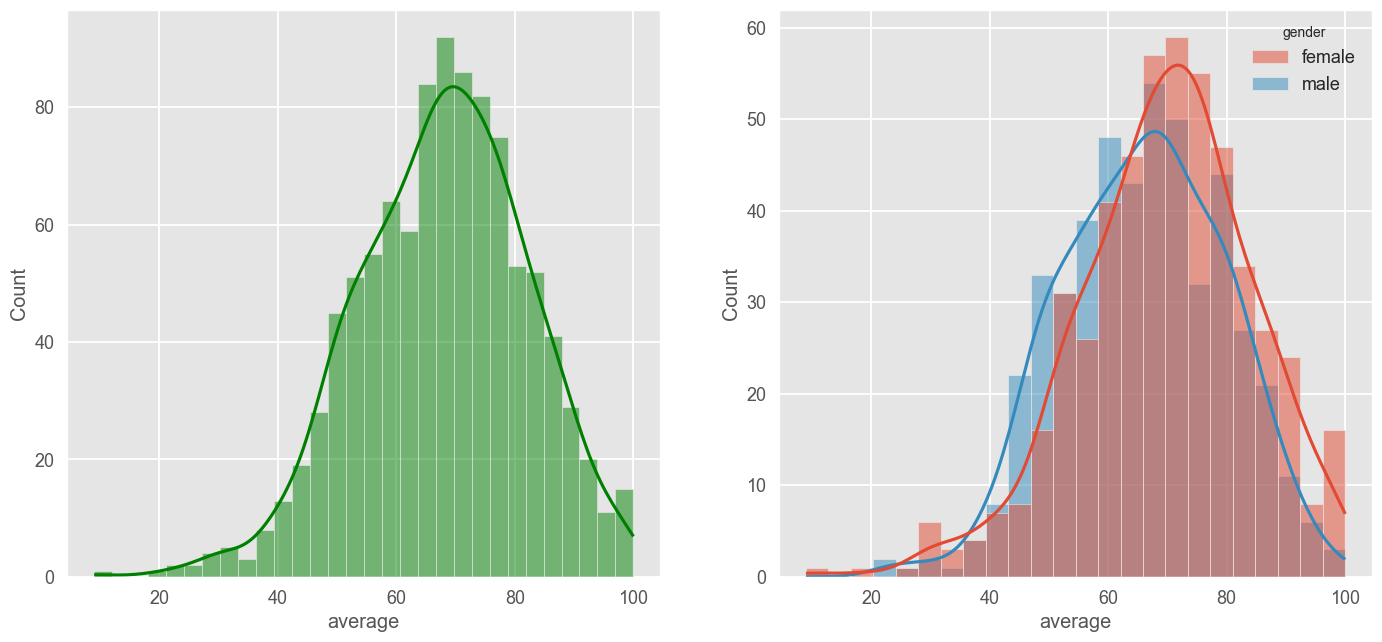

In [277]:
# Plot the distribution of average score
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', kde=True, bins=30, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender') 
plt.show()

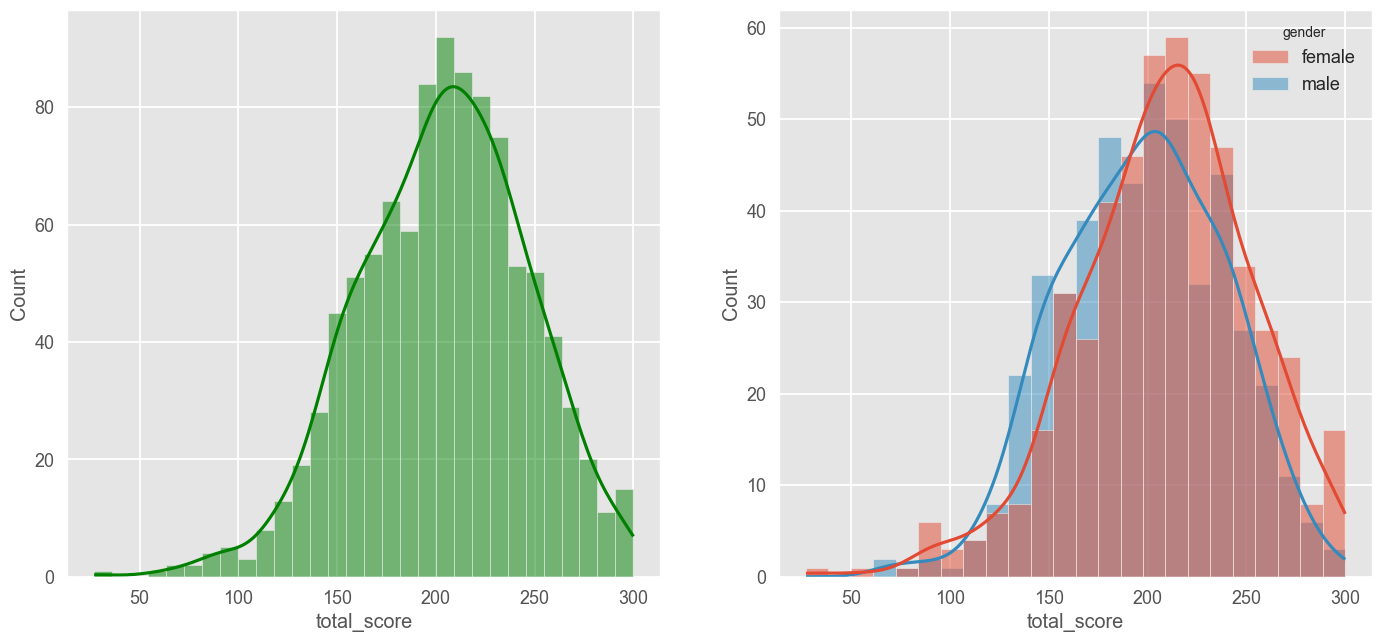

In [278]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', kde=True, bins=30, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.show()

+ Female students have better performance than male students

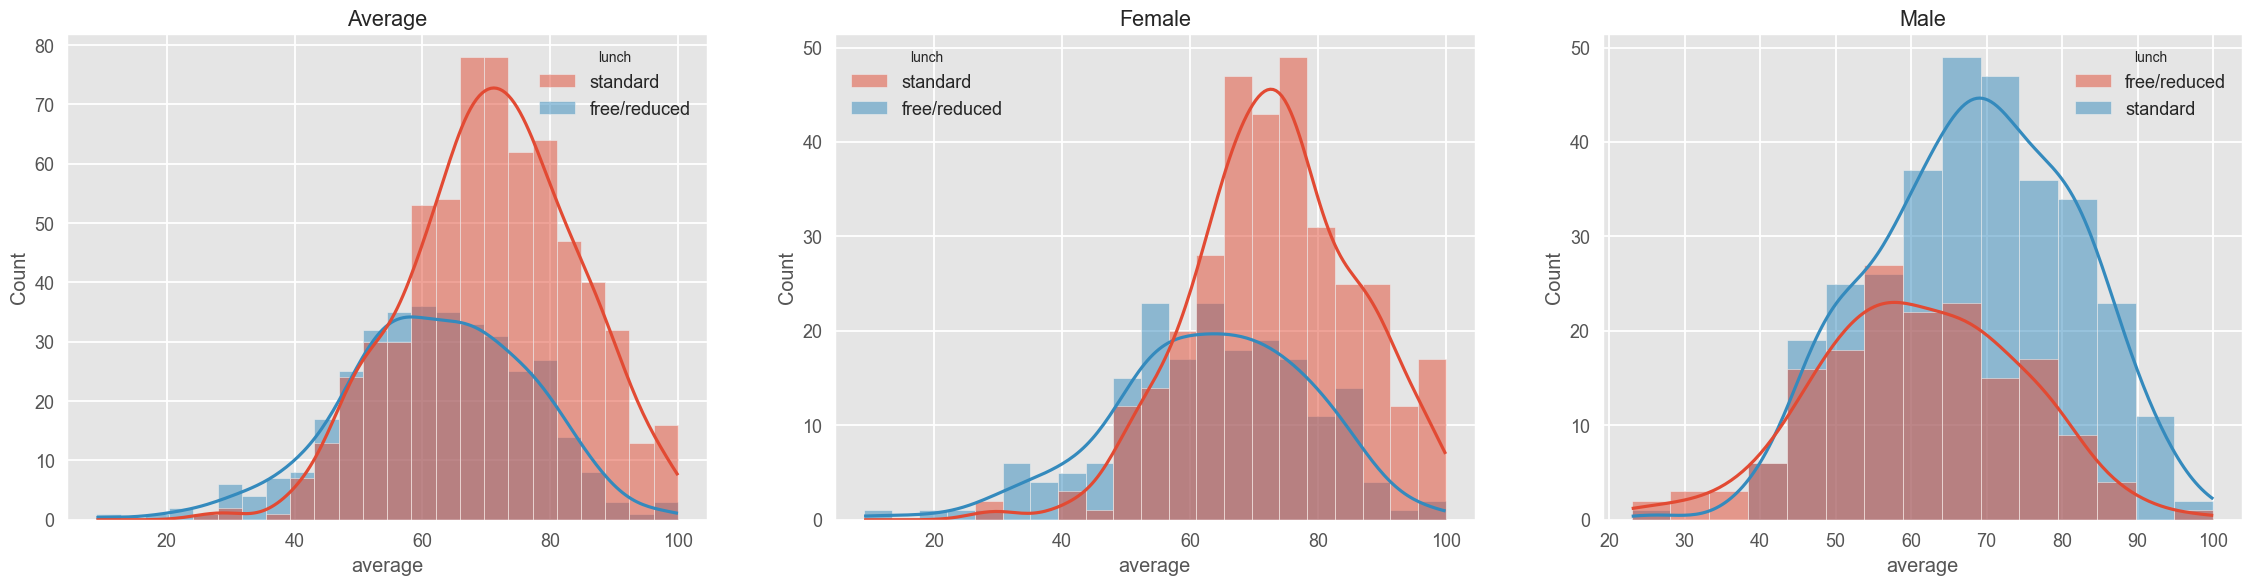

In [279]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131).set_title('Average')
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(132).set_title('Female')
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(133).set_title('Male')
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.show()

+ Having a standard luch helps perofrm well for both male and female 

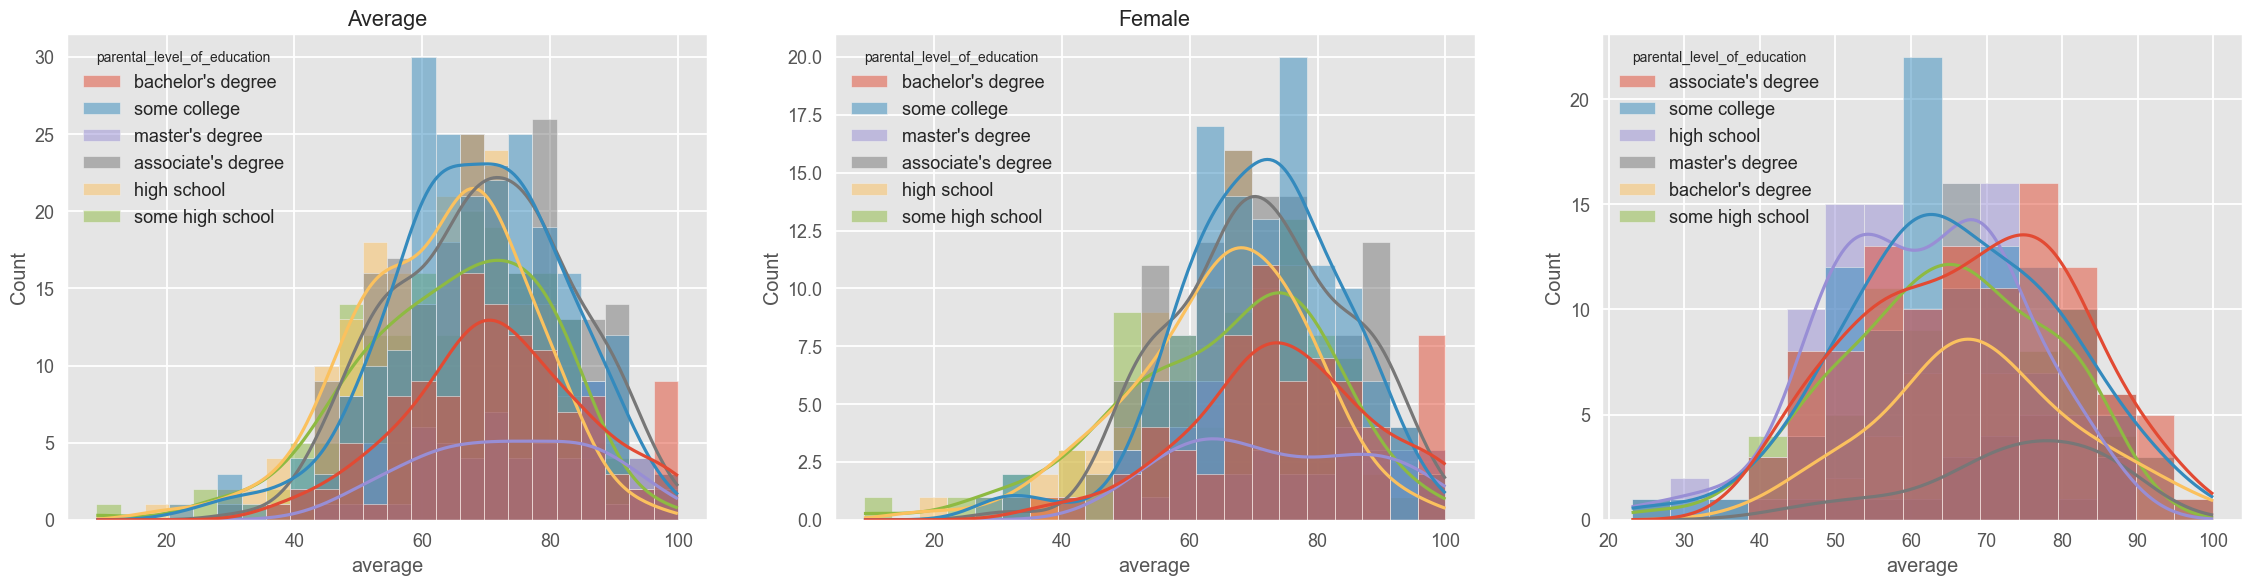

In [280]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131).set_title('Average')
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.subplot(132).set_title('Female')
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental_level_of_education')
plt.show()

+ In general parents level of education don't help students perofrm well in exams
+ Male's plot shows that parents whose education is of associate degree or masters degree their male child tend to perform well in exam
+ Female's plot shows that parents level of education has no effect on female students

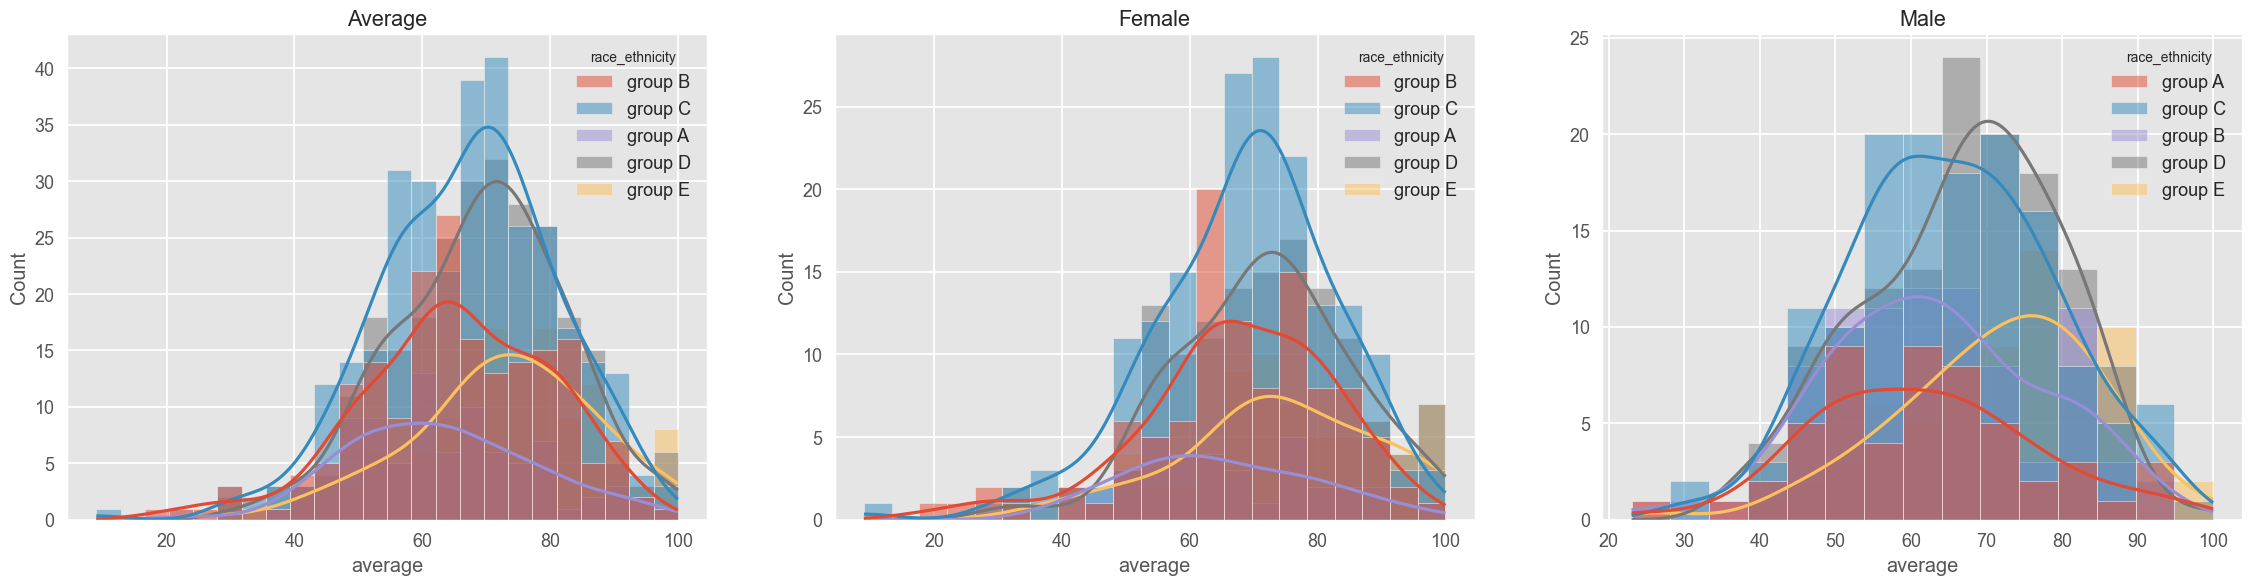

In [281]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131).set_title('Average')
sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')
plt.subplot(132).set_title('Female')
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race_ethnicity')
plt.subplot(133).set_title('Male')
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race_ethnicity')
plt.show()


+ Students from group C have the best exam's performance in average 
+ Male Students from group D have the best performance in exams
+ Group A and B tends to perform poorly in exams irrespective of wheather they are male or female

## 4.2. Students total scores

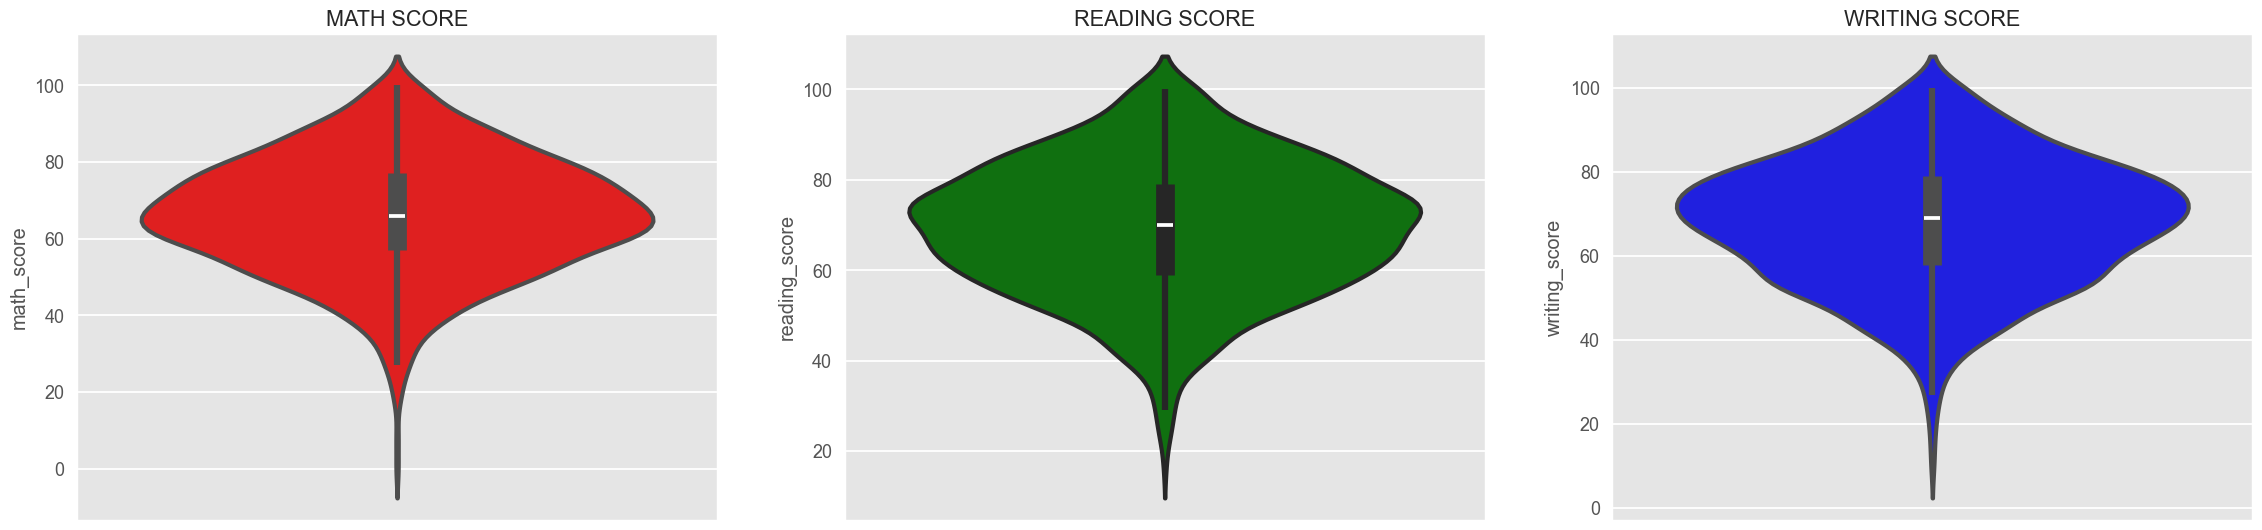

In [282]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(1, 3, 1).set_title('MATH SCORE')
sns.violinplot(data=df, y='math_score', linewidth=3, color='r')

plt.subplot(1, 3, 2).set_title('READING SCORE')
sns.violinplot(data=df, y='reading_score', linewidth=3, color='g')

plt.subplot(1, 3, 3).set_title('WRITING SCORE')
sns.violinplot(data=df, y='writing_score', linewidth=3, color='b')

plt.show()

+ Most of the students score between 60 - 80 in all sbjects

## 4.3. Multivariate Analysis
Multivariate analysis involves examining more than two variables simultaneously.


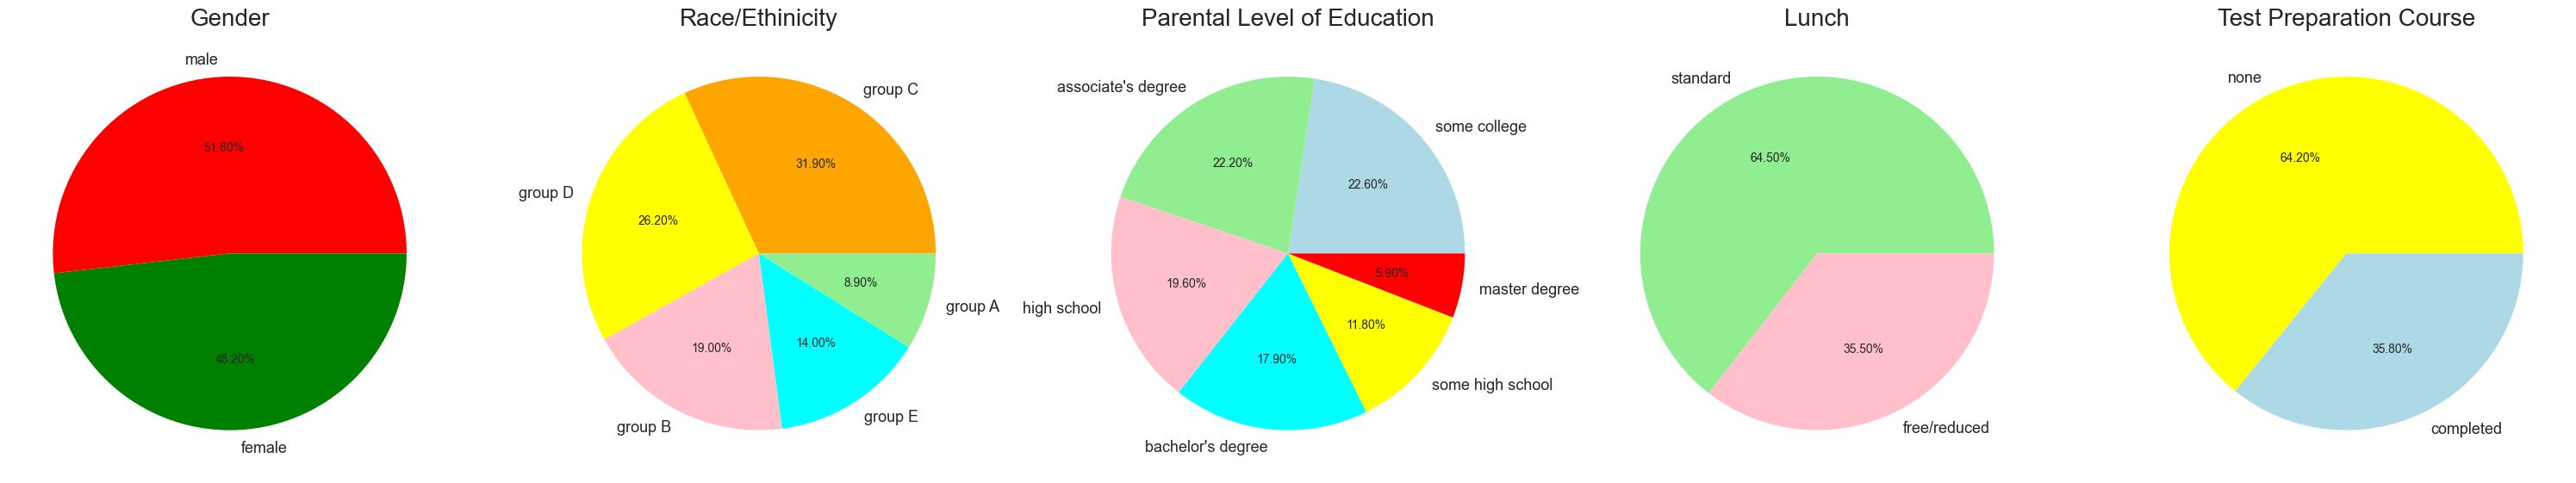

In [283]:
plt.rcParams['figure.figsize'] = (30 , 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = ['male', 'female']
color = ['red', 'green']
plt.pie(size, colors = color, labels=labels, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = ['group C', 'group D', 'group B', 'group E', 'group A']
color = ['orange', 'yellow', 'pink', 'cyan', 'lightgreen']
plt.pie(size, colors = color, labels=labels, autopct = '%.2f%%')
plt.title('Race/Ethinicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['parental_level_of_education'].value_counts()
labels = ['some college', "associate's degree", 'high school', "bachelor's degree", 'some high school', 'master degree']
color = ['lightblue', 'lightgreen', 'pink', 'cyan', 'yellow', 'red']
plt.pie(size, colors = color, labels=labels, autopct = '%.2f%%')
plt.title('Parental Level of Education', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['lunch'].value_counts()
labels = ['standard', 'free/reduced']
color = ['lightgreen', 'pink']
plt.pie(size, colors = color, labels=labels, autopct = '%.2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['test_preparation_course'].value_counts()
labels = ['none', 'completed']
color = ['yellow', 'lightblue']
plt.pie(size, colors = color, labels=labels, autopct = '%.2f%%')
plt.title('Test Preparation Course', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

+ Number of male and female students is almost equal
+ Group C has the largest number of students
+ Number of students whose parent level of education is 'some college' is greater, closely followed by 'associate degree'
+ Number of students who have standard lunch is greater
+ Number of students who have not taken any test preparation course is greater

## 4.4. Feature wise viusal data anaylsis

### 4.4.1. Gender Column
+ How is the distibution of gender
+ Is gender has any impact on student's performance?

# How is the distribution of gender? (Univariate Analysis)

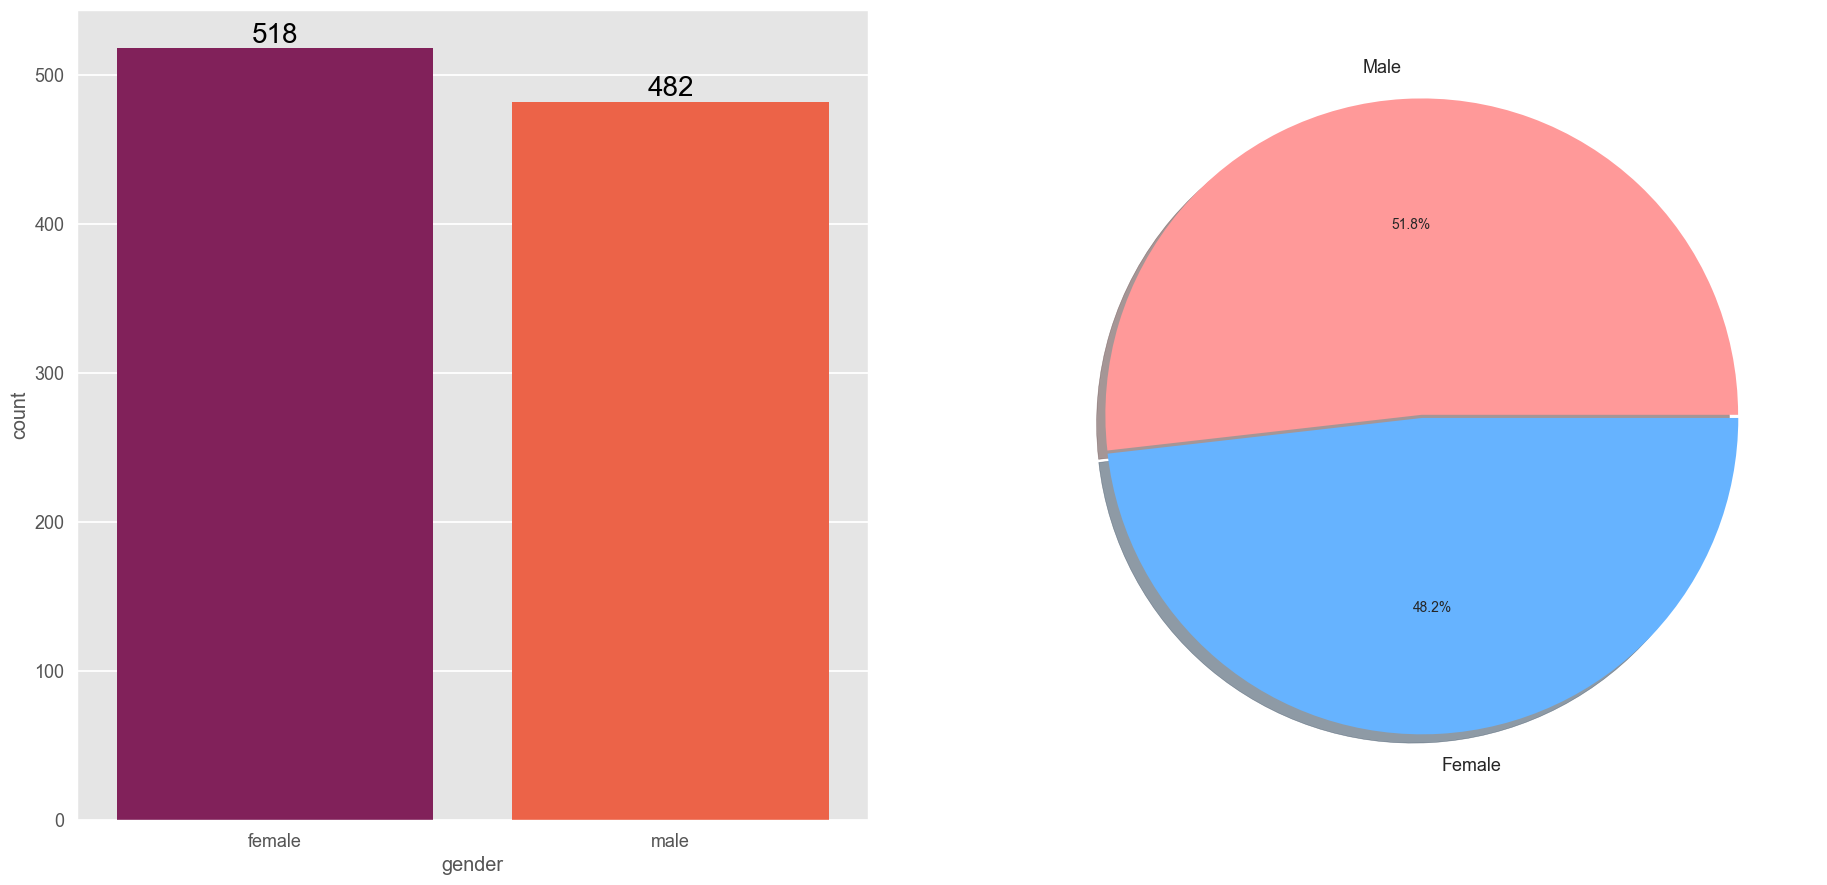

In [284]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(data=df, x=df['gender'], ax=ax[0], palette='rocket', saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', fontsize=20)

plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'],explode=[0.00, 0.01],autopct='%1.1f%%', shadow=True, colors=['#ff9999','#66b3ff'])
plt.show()


# Is gender has any impact on student's performance? (Bivariate Analysis)

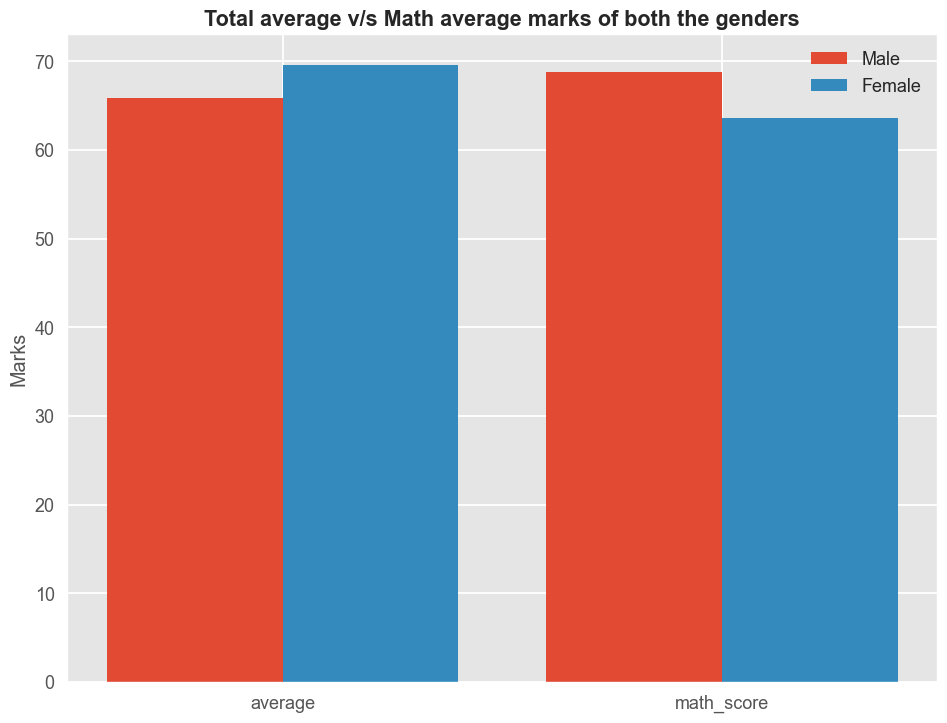

In [285]:
numeric_cols = df.select_dtypes(include=np.number)
gender_group = numeric_cols.groupby(df['gender']).mean()
gender_group
plt.figure(figsize=(10, 8))

X = ['average','math_score']


female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'math_score']]
male_scores = [gender_group.loc['male', 'average'], gender_group.loc['male', 'math_score']]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

+ On an average, females have a better overall score than males
+ Males have scored higher in math

### 4.4.2. Race / Ethnicity column
+ How is the distibution of group?
+ Is race/ethnicity has any impact on student's performance?

# How is the distribution of race/ ethnicity? (Univariate Analysis)

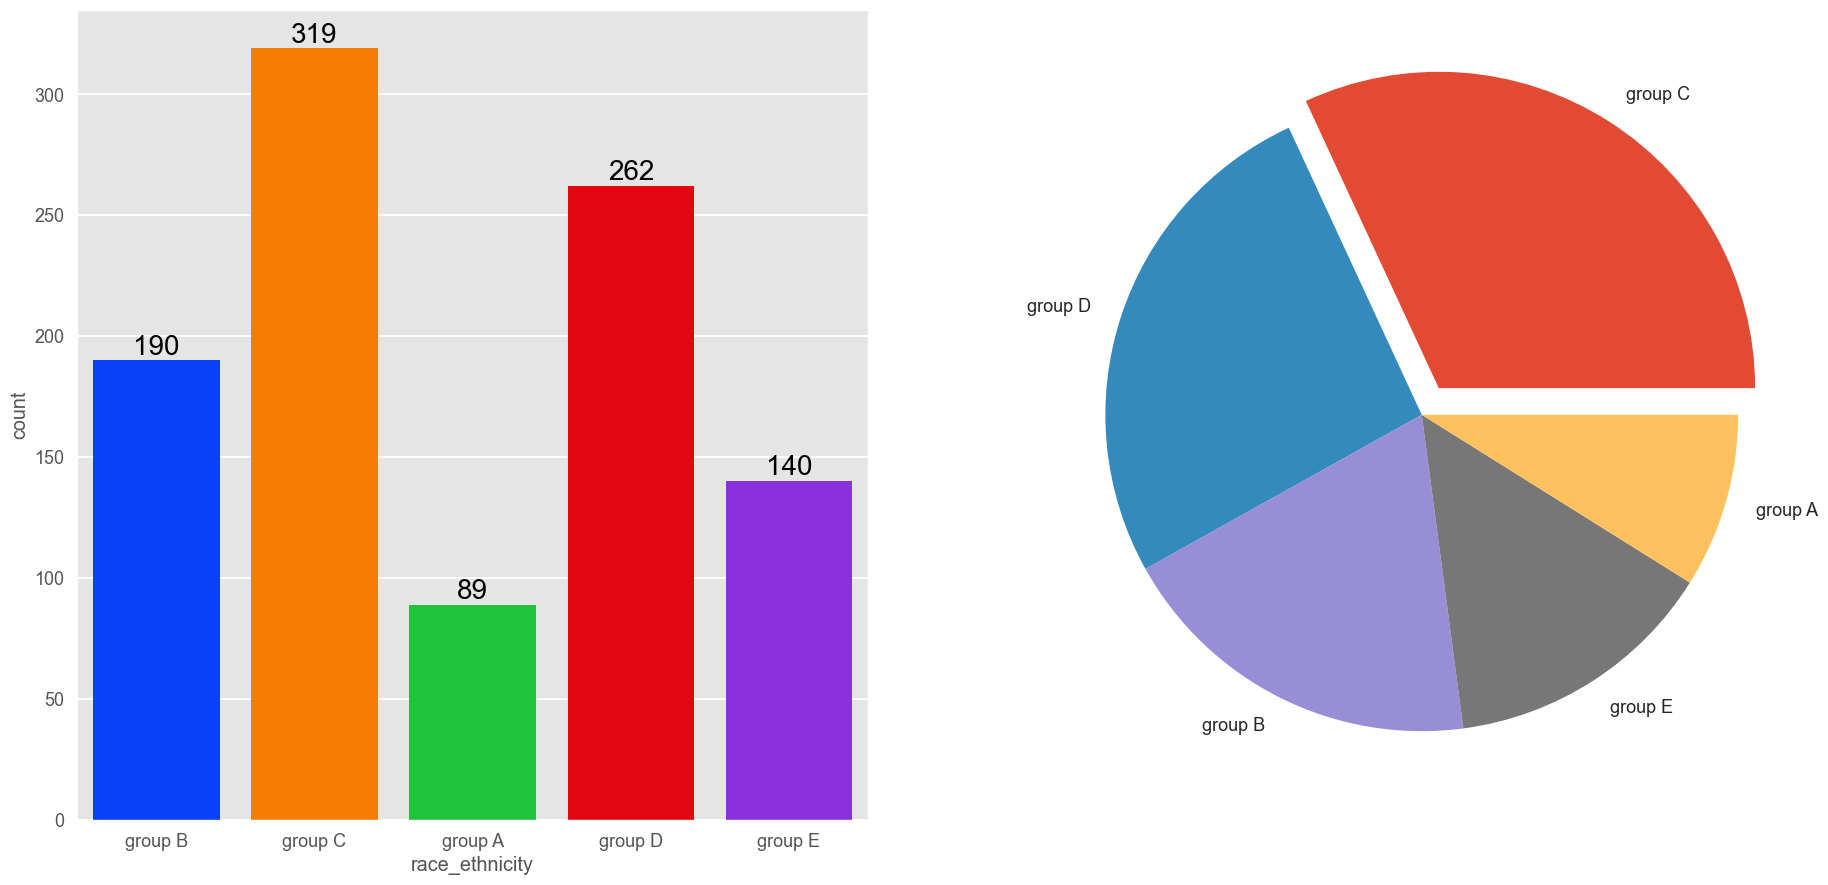

In [286]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df['race_ethnicity'], ax=ax[0],palette='bright', saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', fontsize=20)
number_of_categories = len(df['race_ethnicity'].value_counts())
explode_values = [0.1] + [0] * (number_of_categories - 1)
plt.pie(x=df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts().index, explode=explode_values)
plt.show()

+ Most of the students belong to group C / D
+ Lowest number of students belong to group A

# Is Race/Ethnicity han any impact on student's performance? (Bivariate Analysis)

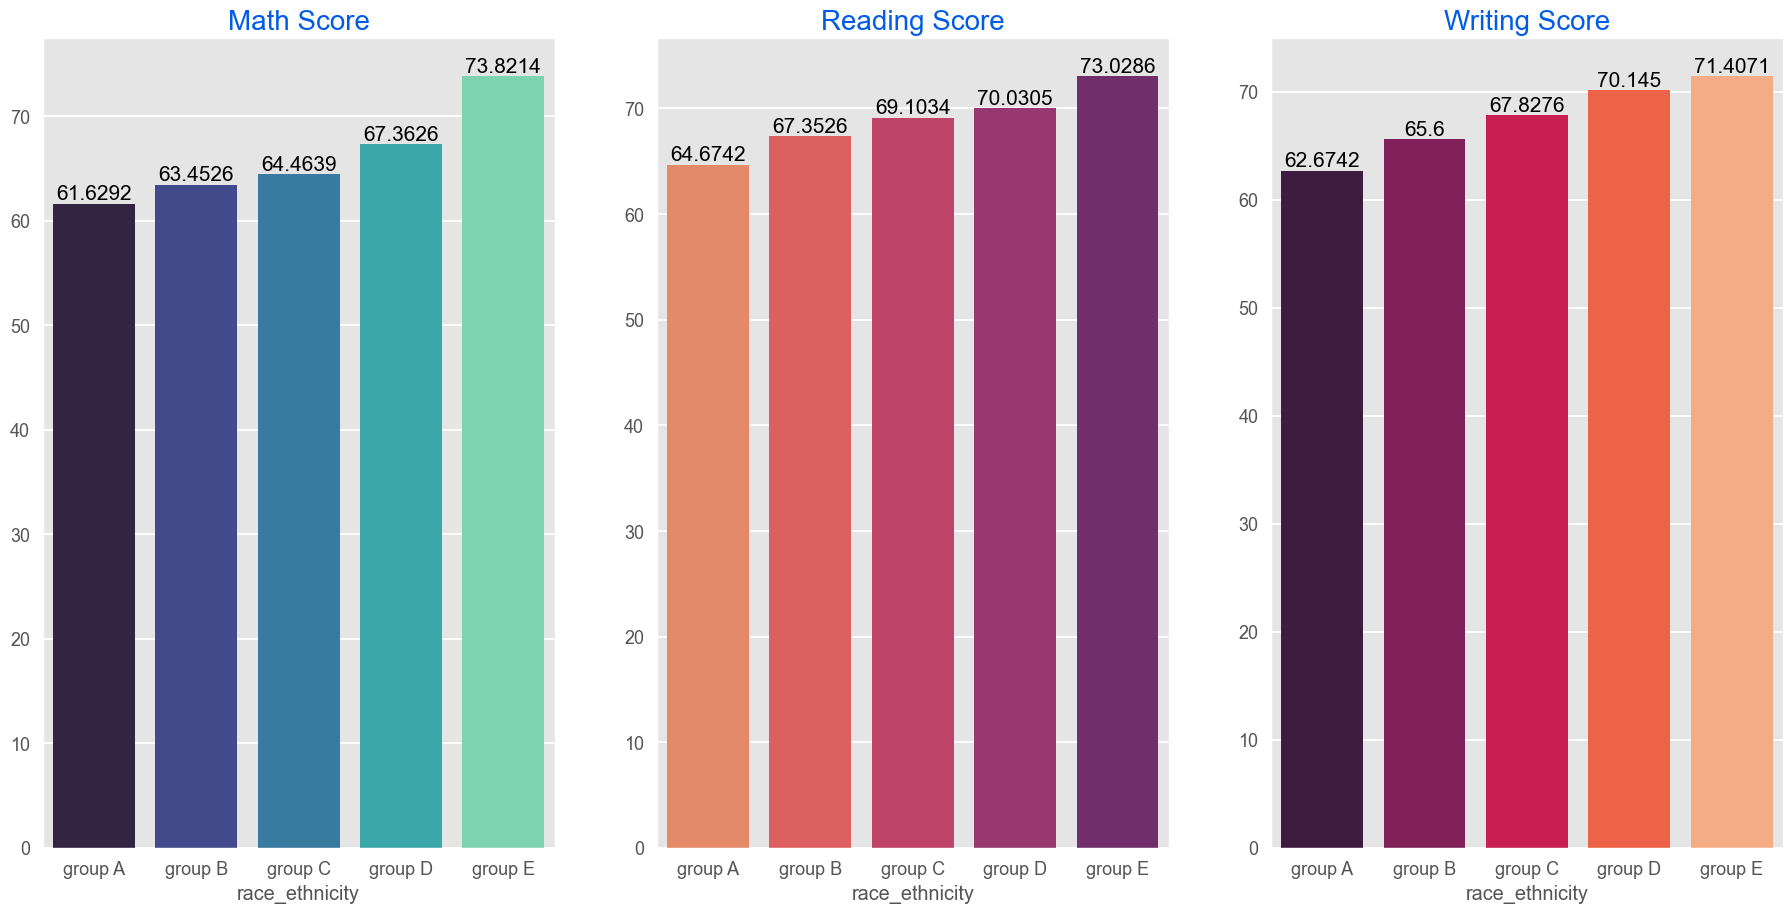

In [287]:
Group_Race = df.groupby('race_ethnicity')
f, ax = plt.subplots(1, 3, figsize=(20, 10))

sns.barplot(x=Group_Race['math_score'].mean().index, y=Group_Race['math_score'].mean().values, ax=ax[0], palette='mako', saturation=0.95)
ax[0].set_title('Math Score', color='#005ce6',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', fontsize=15)

sns.barplot(x=Group_Race['reading_score'].mean().index, y=Group_Race['reading_score'].mean().values, ax=ax[1], palette='flare', saturation=0.95)
ax[1].set_title('Reading Score', color='#005ce6',size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', fontsize=15)

sns.barplot(x=Group_Race['writing_score'].mean().index, y=Group_Race['writing_score'].mean().values, ax=ax[2], palette='rocket', saturation=0.95)
ax[2].set_title('Writing Score', color='#005ce6',size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', fontsize=15)

+ Group E students have scored the highest marks in general
+ Group A students have scored the lowest marks in general

### 4.4.3. Parental Level of Education column
+ What is the educational background of student's parent?
+ Is parental education has any impact on student's performance?


# What is the educational background of student's parent ? (Univariate analysis)

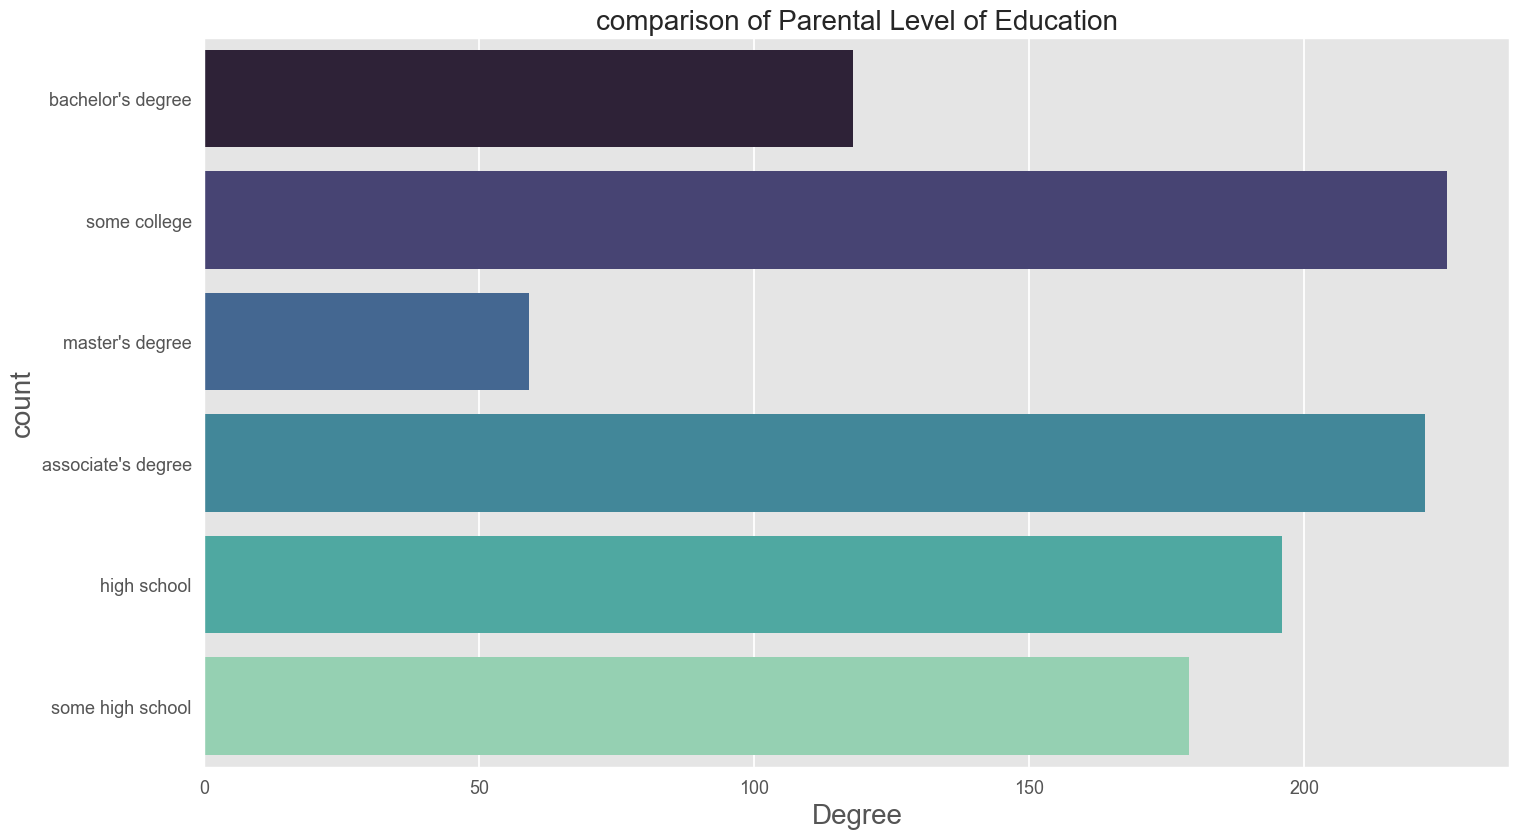

In [288]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')
sns.countplot(df['parental_level_of_education'], palette = 'mako')
plt.title('comparison of Parental Level of Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree', fontsize = 20)
plt.ylabel('count', fontsize = 20)
plt.show()

+ Most of the students' parents are from some college

# Is Parental level of Education has any impact on student's performance? (Bivariate analysis)

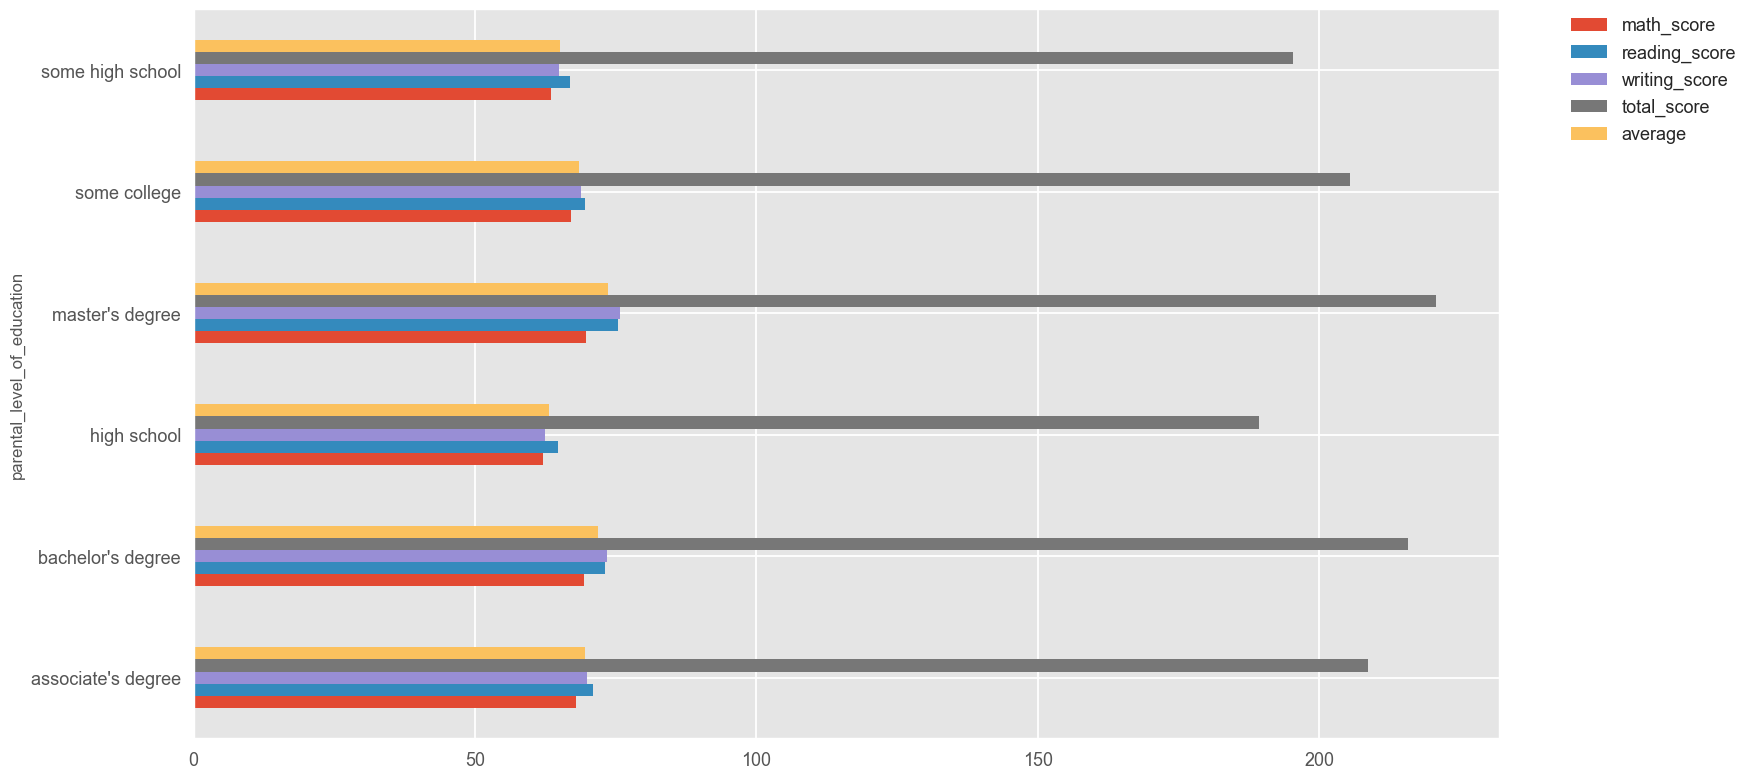

In [289]:
numeric_cols = df.select_dtypes(include=np.number)
mean_values = numeric_cols.groupby(df['parental_level_of_education']).mean()
mean_values.plot(kind='barh', figsize=(15, 9))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

+ The score of student whose parents possess master and bachelor level of education are slightly higher than others

### 4.4.4 Lunch column
+ Which type of lunch is most common among students?
+ Is the type of lunch has any impact on student's performance?

# Which type of lunch is most common among students? (Univariate analysis)

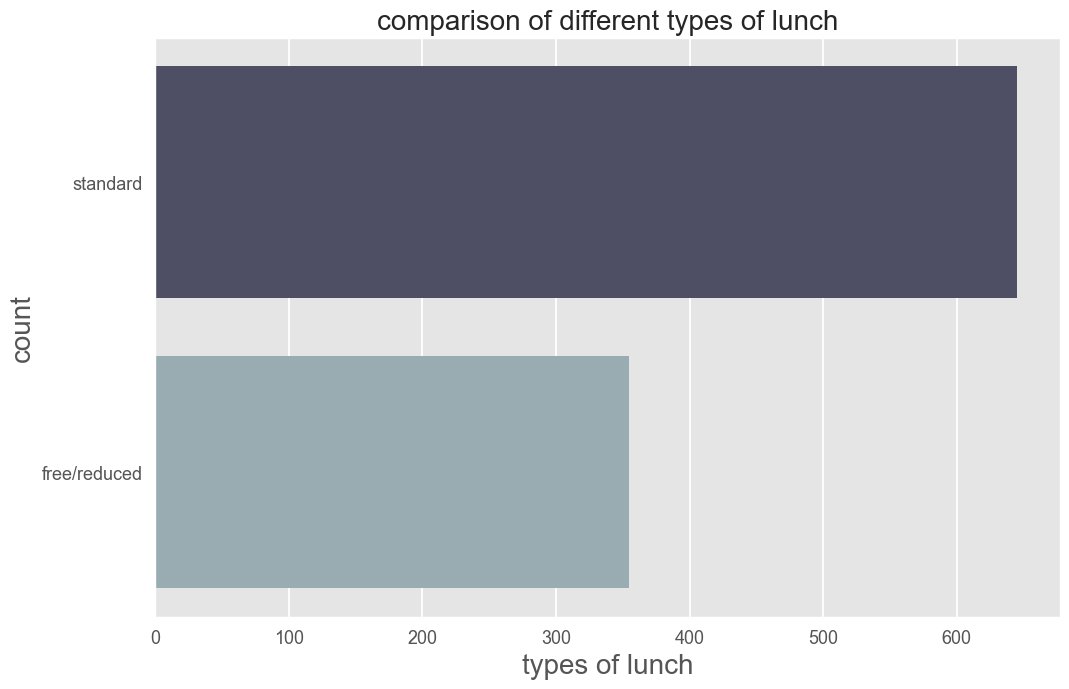

In [290]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'bone')
plt.title('comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch', fontsize = 20)
plt.ylabel('count', fontsize = 20)
plt.show()

+ Students being served a standard lunch were more than a free lunch

# Is the type of lunch has any impact on student's performance? (Bivariate analysis)

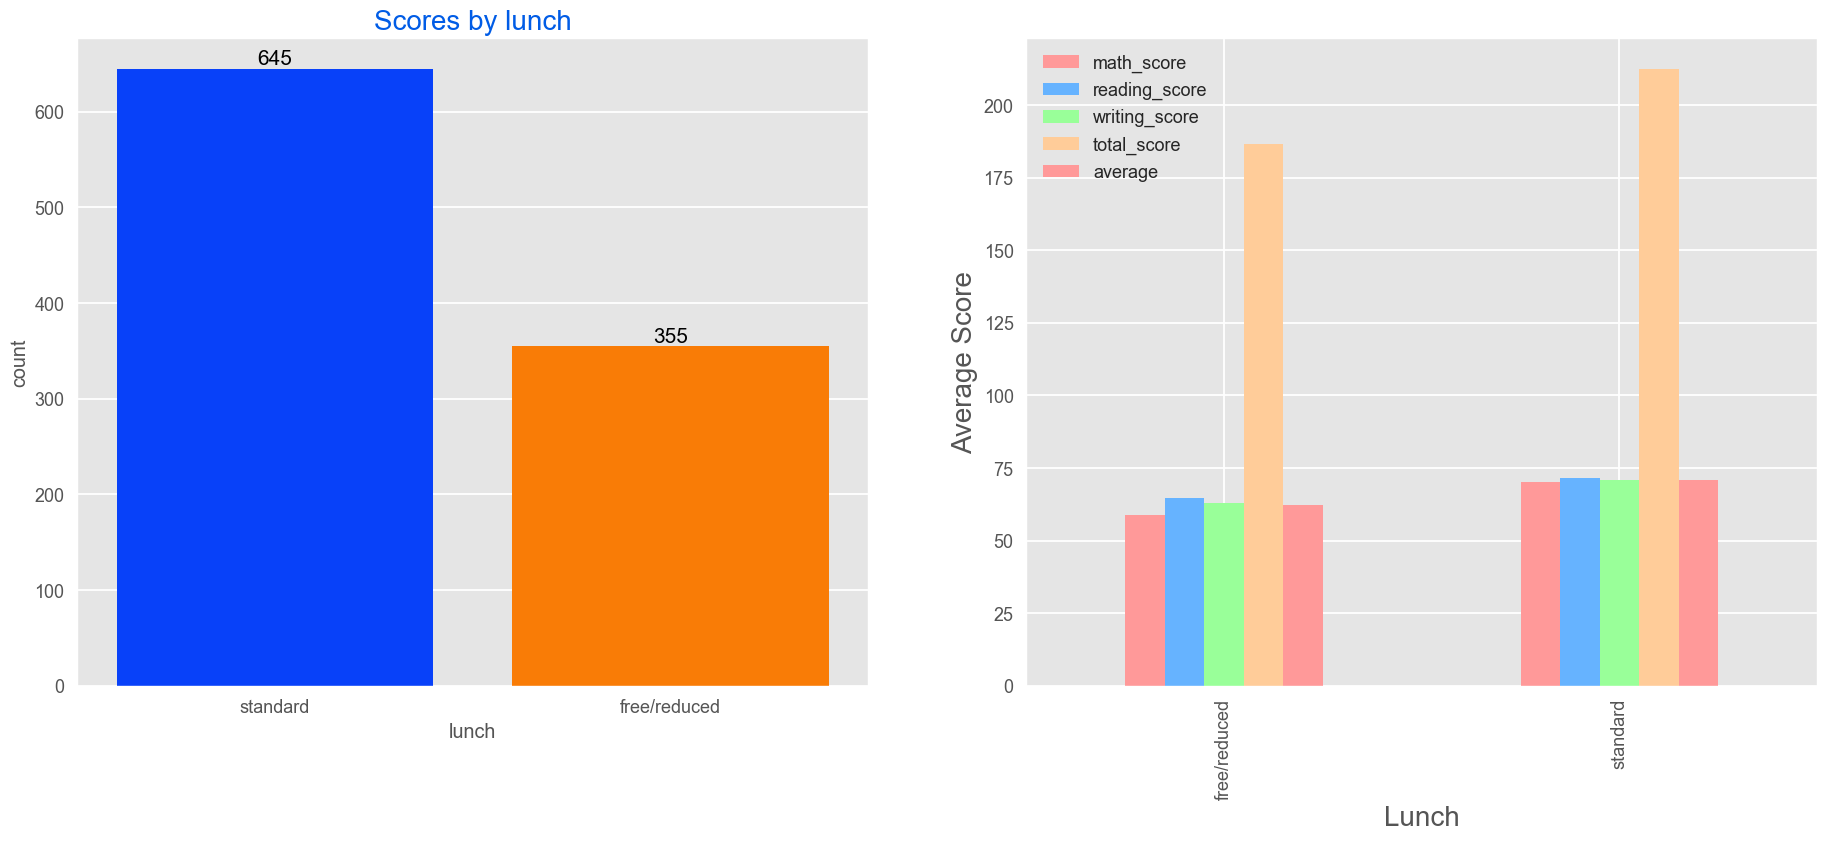

In [291]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
numeric_cols = df.select_dtypes(include=np.number)
mean_scores_by_lunch = numeric_cols.groupby(df['lunch']).mean()
sns.countplot(x=df['lunch'], data=df, ax=ax[0], palette='bright', hue='lunch', saturation=0.95)
ax[0].set_title('Scores by lunch', color='#005ce6',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', fontsize=15)
mean_scores_by_lunch.plot(kind='bar', ax=ax[1], color=['#ff9999','#66b3ff', '#99ff99', '#ffcc99', '#ff9999'])
plt.xlabel('Lunch', fontsize = 20)
plt.ylabel('Average Score', fontsize = 20)
plt.show()



+ Students who get standard lunch tend to perform better than students who got free/reduced lunch

### 4.4.5 Test Preparation column

# Is Test prepration course has any impact on student's performance ? (Bivariate analysis)

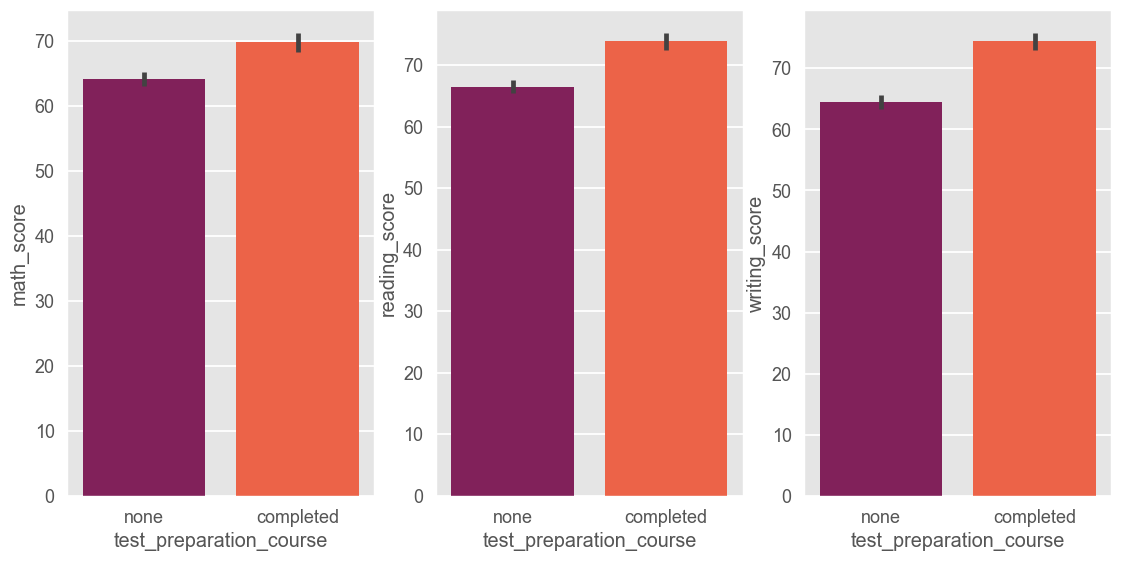

In [292]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.barplot(x=df['test_preparation_course'],y=df['math_score'],hue=df['test_preparation_course'],palette='rocket', saturation=0.95)

plt.subplot(1, 3, 2)
sns.barplot(x=df['test_preparation_course'],y=df['reading_score'],hue=df['test_preparation_course'],palette='rocket', saturation=0.95)

plt.subplot(1, 3, 3)
sns.barplot(x=df['test_preparation_course'],y=df['writing_score'],hue=df['test_preparation_course'],palette='rocket', saturation=0.95)

plt.show()

+ Students who have attended the test prepration course have higher scores than those who haven't attended the course in all three subjects

### 4.4.6 Identifying Outliers

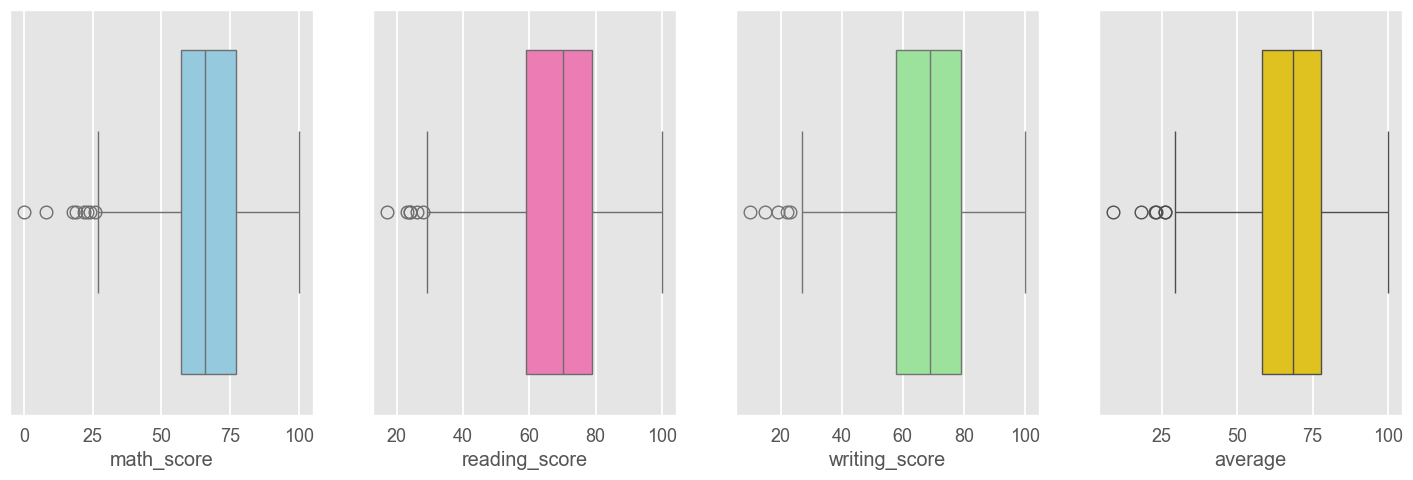

In [293]:
plt.subplots(1, 4, figsize=(16, 5))

plt.subplot(1, 4, 1)
sns.boxplot(x=df['math_score'], color='skyblue')

plt.subplot(1, 4, 2)
sns.boxplot(x=df['reading_score'], color='hotpink')

plt.subplot(1, 4, 3)
sns.boxplot(x=df['writing_score'], color='lightgreen')

plt.subplot(1, 4, 4)
sns.boxplot(x=df['average'], color='gold')

plt.show()

### 4.4.6 Multivariate analysis using pairplot

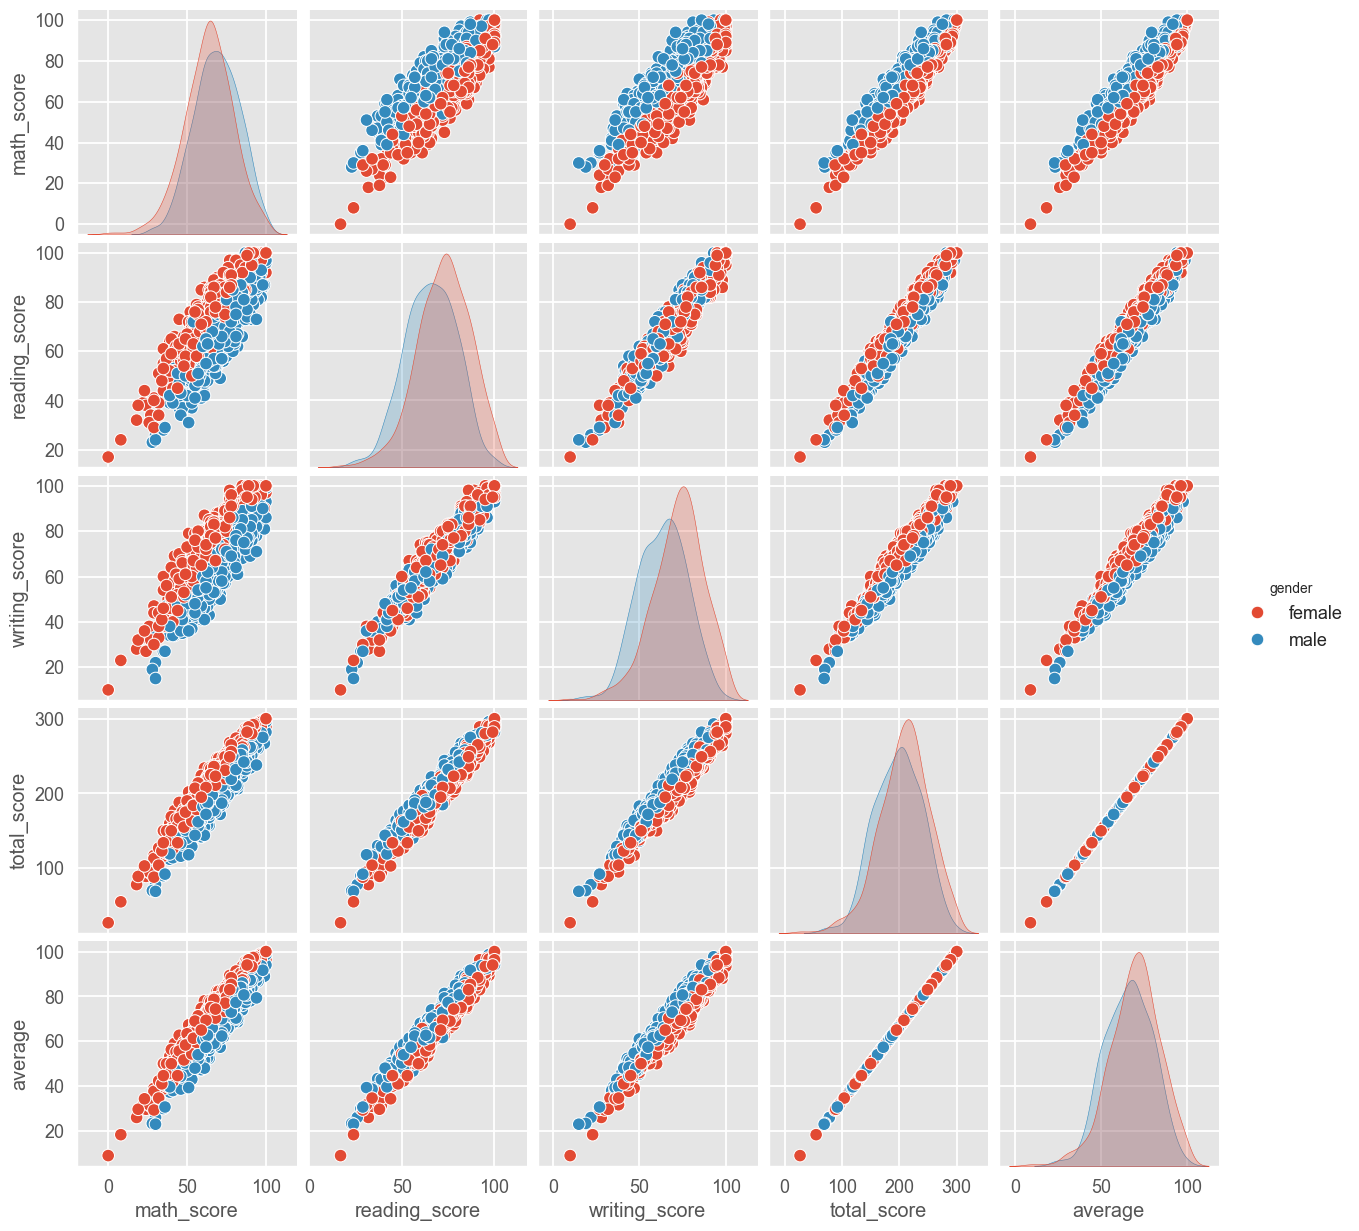

In [294]:
sns.pairplot(df, hue = 'gender')
plt.show()

# 5. Conclusion

+ Student's Performance is related with lunch, race, parental level education
+ Females lead in pass percentage and also are top-scorers
+ Student's Performance is not much related with test preparation course
+ Finishing preparation course is benefitial